### Modal SNA MAP473D, Ecole Polytechnique, 2019-20

# TP4 - Processus de Poisson compos√©s, transformation de Esscher, splitting et MCMC

Quelques rappels en python :

- `random.exponential` du module `numpy`. Pour la simulation de v.a. exponentielles. Attention √† la convention sur les param√®tres.
- `random.poisson` du module `numpy`. Pour la simulation de v.a. de Poisson.
- `poisson.sf` du module `scipy.stats`. Pour la fonction de survie d'une v.a. de Poisson.
- `random.standard_cauchy` du module `numpy`. Pour la simulation de v.a. de Cauchy standards.
- `cumsum` du module `numpy`.  Pour le calcul de la somme cumul√©e des √©l√©ments d'un tableau.
- `sort` du module `numpy`. Pour ordonner les √©l√©ments d'un tableau.
- `boxplot` du module `matplotlib.pyplot`. Pour tracer des bo√Ætes √† moustaches (boxplots).

Repr√©sentation d'un array `numpy` par un boxplot :  affichage d'une bo√Æte rectangulaire d√©limit√©e par les premier et troisi√®me quartiles ; la
  barre in√©trieure (rouge) donne la m√©diane ; la "moustache" inf√©rieure (resp. sup√©rieure) va jusqu'√† la
  valeur la plus petite (resp. grande) situ√©e entre le premier (resp. troisi√®me) quartile et 1.5 fois la hauteur de la bo√Æte ; les √©ventuels points de l'√©chantillon au-del√† des moustaches sont repr√©sent√©s par des "+".

## 1. Processus  de Poisson homog√®nes et compos√©s

### 1.1. Rappels : Processus de Poisson

Soit $\lambda >0$.
Un processus de Poisson homog√®ne de param√®tre $\lambda$ est un processus
$(N_t)_{t\geq 0}$ issu de $0$, √† accroissement ind√©pendants, tel que pour tout
$0 \leq s < t$, $N_t-N_s$ suit une loi de Poisson de param√®tre $\lambda(t-s)$.

Ce processus peut √™tre obtenu en posant
$$N_t = \textrm{Card}\{k\geq 1~: T_k\leq t\} = \sum_{k \geq 1} \mathbf{1}_{T_k \leq t}$$
o√π $T_k = T_{k-1} + E_k = E_1 + \cdots + E_k$,  pour des v.a. $(E_i)_{i \geq 1}$ i.i.d. de loi exponentielle de param√®tre $\lambda$, et par convention $T_0 =0$.

Soit $\lambda >0$ et $\nu$ une loi de probabilit√© sur $\mathbb{R}$. Un processus
  de Poisson compos√© de param√®tres $(\lambda, \nu)$ est un processus $(X_t)_{t\geq
  0}$ d√©fini par
$$X_t = \sum_{k=1}^{N_t} Y_k,$$
o√π les sauts $(Y_k)_{k \geq 1}$ sont des v.a. r√©elles i.i.d. de loi $\nu$
ind√©pendantes de $(N_t)_{t \geq 0}$, processus de Poisson homog√®ne de param√®tre
$\lambda$.

### 1.2. Simulations d'un processus  de Poisson homog√®ne

##### Simulation d'une trajectoire sur $[0,T_n]$, $n$ fix√© 
Utiliser le fait que 
$$N_t = \begin{cases}0&\textrm{pour $t\in [0, T_1[$,}\\
  1&\textrm{pour $t\in [T_1, T_2[$,}\\
  2&\textrm{pour $t\in [T_2, T_3[$,}\\
  \vdots &\quad\vdots\end{cases}$$
et que les instants de sauts $(T_k)_{1
  \leq k \leq n}$ s'expriment √† l'aide de tirages de la loi exponentielle. 

#####  Simulation d'une trajectoire sur $[0,T]$, $T$ fix√© 
Utiliser la loi de $N_T$ puis le fait que, conditionnellement √† l'√©v√©nement $\{N_T = k \}$, la loi des instants de sauts $(T_1, \cdots, T_k)$ est la loi de $k$ v.a. uniformes sur $[0,T]$ r√©ordonn√©es (cf. Amphi 1). Pour l'affichage d'une fonction en escalier, on pourra utiliser la fonction `step` de `matplotlib.pyplot` (nous vous conseillons de consulter la documentation de cette fonction, notamment pour comprendre le r√¥le de son argument "`where`").  

##### Question 1
En utilisant ces deux approches, simuler et tracer sur une m√™me figure une trajectoire d'un processus de Poisson homog√®ne jusqu'√† l'instant $T_n$ d'une part (pour $n\ge 1$ fix√©), et une trajectoire jusqu'√† l'instant $T$ d'autre part (pour $T>0$ fix√©). On pourra par exemple prendre $n=30$, $\lambda=3$ et $T=n/\lambda=10$.

##### _R√©ponse :_

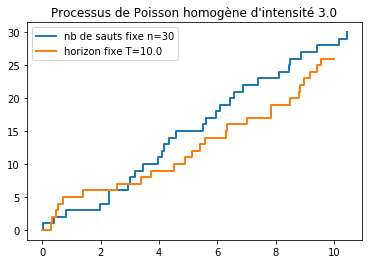

In [16]:
from numpy import zeros, cumsum, arange, append
from numpy.random import poisson, rand, exponential
from matplotlib.pyplot import figure, step, title, legend
###############################################################################
## Simulation jusqu'√† T_n
###############################################################################
def homogeneous_poisson_until_Tn(la, n):    
    scale = 1. / la
    E = exponential(scale, size=n+1)
    E[0]=0
    events = cumsum(E)
    jumps = arange(n+1)
    return events, jumps

la = 3.
n = 30
events, jumps = homogeneous_poisson_until_Tn(la, n)
step(events, jumps, where="post", label="nb de sauts fixe n=%s"%n, linewidth=2.0)
###############################################################################
## Simulation jusqu'√† T
###############################################################################
def homogeneous_poisson_until_T(la, T):
    N = poisson(T * la)
    events = T * rand(N+1)
    events[0] = 0
    events.sort()
    events = append(events,T)
    jumps = arange(N+1)
    jumps = append(jumps,N)
    return events, jumps

T=n/la
events, jumps = homogeneous_poisson_until_T(la, T)
step(events, jumps, where="post", label="horizon fixe T=%1.1f"%T, linewidth=2.0)
title("Processus de Poisson homog√®ne d'intensit√© " + str(la), fontsize=12)
legend(loc="best")
None

##### Question 2  
Adapter le code pr√©c√©dent pour tracer deux trajectoires d'un processus de Poisson compos√© sur $[0,T]$ : pour la loi des sauts $(Y_k)_{k\ge 1}$, on envisagera successivement une loi exponentielle (par exemple de moyenne 2), puis la loi de la valeur absolue d'une v.a. de Cauchy standard.  Quelle diff√©rence remarque-t-on dans la r√©gularit√© de l'amplitude des sauts ? 

##### _R√©ponse :_ 
L'amplitude des sauts est plus irr√©guli√®re pour des sauts de loi la valeur absolue d'une v.a. de Cauchy standard, ceci √©tant bien s√ªr d√ª au fait que $\mathbb{E}[Y_1]=+\infty$. Ce ph√©nom√®ne se voit d'autant mieux que l'on choisit $T$ grand dans le code ci-dessous. En effet, dans le cas de sauts exponentiels, en √©crivant
$$\frac{X_t}{t}=\frac{N_t}{t}\times\frac{1}{N_t}\sum_{k=1}^{N_t} Y_k,$$
et en appliquant deux fois la loi des grands nombres, on peut montrer que 
$$\frac{X_t}{t}\xrightarrow[t\to\infty]{p.s.}\lambda\mathbb{E}[Y_1].$$
De fait, pour $t$ "grand", le processus X_t oscille autour de la droite de pente $\lambda\mathbb{E}[Y_1]$. 

A contrario, pour des sauts de loi la valeur absolue d'une v.a. de Cauchy standard, une g√©n√©ralisation de la loi des grands nombres assure en fait que, dans ce cas, la moyenne empirique des sauts tend p.s. vers l'infini :
$$\frac{1}{n}\sum_{k=1}^nY_k\xrightarrow[n\to\infty]{p.s.}+\infty$$
et le comportement est fondamentalement diff√©rent.

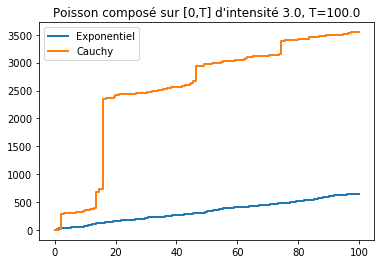

In [19]:
from numpy import zeros, cumsum, append
from numpy.random import poisson, rand, exponential, standard_cauchy
from matplotlib.pyplot import figure, step, title, legend

def compound_poisson_until_T(la, T, jumps_distribution="exponential",
                            scale_jumps=2.):
    N = poisson(T * la)
    events = T * rand(N+1)
    events[0] = 0
    events.sort()
    events = append(events,T)
    jumps = zeros(N+1)
    if jumps_distribution == "exponential":
        jumps[1:] = cumsum(exponential(scale_jumps, size=N))
    if jumps_distribution == "cauchy":
        jumps[1:] = cumsum(abs(standard_cauchy(size=N)))
    jumps = append(jumps,jumps[-1])
    return events, jumps

# Sauts exponentiels
la = 3. 
T = 100.
events, jumps = compound_poisson_until_T(la, T, "exponential")
step(events, jumps, where="post", linewidth=2.0)
title("Poisson compos√© sur [0,T] d'intensit√© " + str(la) + ", T=" + str(T))

# Sauts valeur absolue de Cauchy
events, jumps = compound_poisson_until_T(la, T, "cauchy")
step(events, jumps, where="post", linewidth=2.0)
legend(['Exponentiel', 'Cauchy'],loc="best")
None

## 2. Changement de probabilit√© pour les processus de Poisson  

Soient $\lambda >0$, $\nu$ une loi de probabilit√© sur $\mathbb{R}$, des v.a. r√©elles
  $(Y_k)_{k \geq 1}$ et un processus $(N_t)_{t \geq 0}$ d√©finis sur l'espace
  probabilisable $(\Omega, \mathcal{F})$. On munit cet espace de la probabilit√©
  $\mathbb{P}$ telle que, sous $\mathbb{P}$, les v.a. $(Y_k)_{k \geq 1}$ sont i.i.d. de loi
  $\nu$ et ind√©pendantes de $(N_t)_{t \geq 0}$, processus de Poisson homog√®ne
  de param√®tre $\lambda$.  Notons
 $$X_t = \sum_{k=1}^{N_t} Y_k.$$
  D'apr√®s la Section 1, sous $\mathbb{P}$, $(X_t)_{t \geq 0}$
  est un processus de Poisson compos√© de param√®tres $(\lambda, \nu)$. Dans la
  suite, $\mathbb{E}$ et $\mathbb{V}$ d√©signent respectivement l'esp√©rance et la variance sous $\mathbb{P}$.

  
 ### 2.1. Rappel de cours : la transformation de Esscher
 √Ä toute fonction mesurable $f: \mathbb{R} \to \mathbb{R}$ telle que $ \mathbb{E}\left[ \exp(f(Y_1)) \right]< \infty$, on associe une loi de probabilit√© $\mathbb{P}_f$ sur
  $(\Omega, \mathcal{F})$ d√©finie par
$$\mathbb{P}_f (A)=\mathbb{E}\left[ \mathbf{1}_A \ \exp\left\{ \sum_{k=1}^{N_T} f(Y_k) - \lambda T \left(  \mathbb{E}\left[ \exp(f(Y_1)) \right]-1 \right) \right\} \right] \qquad\qquad\qquad (1)$$
pour tout $A \in \mathcal{F}_T= \sigma\left(X_s, s \leq T \right)$.  Sous $\mathbb{P}_f$, $(X_t)_{t\geq 0 }$ est encore un processus de Poisson compos√©, mais de param√®tres $(\lambda^f, \nu^f)$ donn√©s par (cf. Amphi 3)
  $$\lambda^f = \lambda \, \mathbb{E} \left[ \exp(f(Y_1))\right], \qquad \nu^f(dy)=\frac{\exp(f(y))}{\mathbb{E}\left[ \exp(f(Y_1)) \right]} \, \nu(dy).$$

### 2.2. Cas de sauts constants
  Dans cette section, on s'int√©resse au calcul de $\mathbb{P}(X_T >x)$ pour de grandes valeurs $x$ dans le cas o√π $\nu$ est la mesure de Dirac en $\alpha>0$, c'est-√†-dire $\mathbb{P}(Y_1 =\alpha) =1$. On a donc tout simplement $X_t = \alpha \,  N_t$ pour tout $t\geq 0$. Dans toute la suite, pour $\theta \in \mathbb{R}$, on notera respectivement  $\mathbb{P}_\theta,
 \nu^\theta, \lambda^\theta$ les quantit√©s $\mathbb{P}_f, \nu^f, \lambda^f$
 introduites en Section 2.1 lorsque $f: y \mapsto \theta y$. Enfin,
 $\mathbb{E}_\theta$ et $\mathbb{V}_\theta$ d√©signent l'esp√©rance et la variance sous $\mathbb{P}_\theta$.

##### Question 3 
Pour $\theta \in \mathbb{R}$, calculer la fonction log-laplace $\Gamma_T(\theta)$
    associ√©e √† $X_T$, d√©finie par 
$$\Gamma_T(\theta)=\log\mathbb{E}[\exp({\theta X_T})].$$ 
En d√©duire l'esp√©rance et la variance de $X_T$ sous $\mathbb{P}$.

##### _R√©ponse :_
D'apr√®s le cours (ou un calcul direct), on a 
$$\Gamma_T(\theta)=\lambda T(\mathbb{E}[\exp(\theta Y)]-1),$$
ce qui ici donne tout simplement
$$\Gamma_T(\theta) = \lambda T \left( \exp(\alpha \theta) - 1\right).$$
En particulier, on en d√©duit que
$$\mathbb{E}\left[X_T \right] = \Gamma'_T(0)= \lambda T \alpha\hspace{1cm}\mathrm{et}\hspace{1cm}\mathbb{V}(X_T) = \Gamma''_T(0) =  \lambda T \alpha^2.$$
Remarque : on peut noter que $\mathbb{E}\left[X_T \right]=\mathbb{E}\left[N_T \right]\times\mathbb{E}\left[Y \right]$, qui est un cas particulier de la formule de Wald.

##### Question 4  
Exprimer le changement de loi (1) √† l'aide de $X_T, \theta$ et $\Gamma_T(\theta)$. Quelle est la loi de $(X_t)_{t \geq 0}$ sous $\mathbb{P}_\theta$, pour $\theta \in \mathbb{R}$ ? 

##### _R√©ponse :_
Pour tout $A \in \sigma\left(N_s, s \leq T\right)$,
$$\mathbb{P}_\theta(A) = \mathbb{E}\left[ \mathbf{1}_A \exp\left( \alpha \theta N_T -
        \Gamma_T(\theta) \right) \right] = \mathbb{E}\left[ \mathbf{1}_A \exp\left( \theta X_T -
        \Gamma_T(\theta) \right) \ \right],$$
et d'apr√®s le rappel, sous $\mathbb{P}_\theta$, $(X_t)_{t \geq 0}$ est un processus de Poisson compos√© de param√®tres
$$\lambda^\theta = \lambda \exp(\alpha \theta)\hspace{1cm}\mathrm{et}\hspace{1cm} \nu^\theta \equiv
      \nu = \delta_\alpha.$$
Avec ce changement de loi, on ne change pas la loi des sauts, mais on augmente (resp. diminue) le nombre moyen de sauts en choisissant $\theta >0$ (resp. $\theta <0$).


##### Question 5 
Soit $\theta \in \mathbb{R}, T >0$. En d√©duire l'expression d'une v.a.
  $L_{\theta,T}$ telle que pour toute fonction mesurable positive $g :\mathbb{R} \rightarrow \mathbb{R}_{+}$ on ait
$$\mathbb{E}\left[ g(X_T) \right] = \mathbb{E}_\theta \left[ g(X_T) \frac{1}{L_{\theta,T}}\right]. \qquad\qquad\qquad (2)$$
En notant $I=\mathbb{E}\left[ g(X_T) \right]$, donner l'expression d'un estimateur par √©chantillonnage d'importance $\hat I_M^{IS}$ bas√© sur $M$ simulations i.i.d. $\tilde X_T^{(k)}$ sous $\mathbb{P}_\theta$. Montrer que $\hat I_M^{IS}$ est asymptotiquement normal, en explicitant la variance asymptotique $(\sigma^{IS})^2$. Proposer un estimateur $(\hat\sigma^{IS}_M)^2$ de cette variance en fonction des $\tilde X_T^{(k)}$ et en d√©duire un intervalle de confiance asymptotique √† $95\%$ de $I$.

##### _R√©ponse :_
Dans la question pr√©c√©dente, en rempla√ßant $\mathbf{1}_A$ par $g(X_T)$, qui est bien $\mathcal{F}_T$-mesurable, il vient
$$\mathbb{E}_\theta[g(X_T)] = \mathbb{E}\left[ g(X_T) \exp\left( \alpha \theta N_T -
        \Gamma_T(\theta) \right) \right] = \mathbb{E}\left[ g(X_T) \exp\left( \theta X_T -
        \Gamma_T(\theta) \right) \ \right],$$
ce qui √©quivaut √†
$$\mathbb{E}\left[g(X_T) \right] = \mathbb{E}_\theta \left[ g(X_T) \exp(-\theta X_T +  \Gamma_T(\theta)) \right],$$
donc $L_{\theta,T} = \exp(\theta X_T -  \Gamma_T(\theta))$.

A partir de $M$ simulations i.i.d. $\tilde X_T^{(k)}$ sous $\mathbb{P}_\theta$, l'estimateur Monte-Carlo par √©chantillonnage d'importance de $I=\mathbb{E}\left[ g(X_T) \right]$ s'√©crit 
$$\hat I^{IS}_M  = \frac{1}{M} \sum_{k=1}^M g(\tilde X_T^{(k)})
        \exp(-\theta\tilde X_T^{(k)} + \Gamma_T(\theta)).$$
Par le th√©or√®me central limite, on a donc
$$\sqrt{M}\left(\hat I^{IS}_M-I\right)\xrightarrow[M\to\infty]{d}\mathcal{N}(0,(\sigma^{IS})^2),$$
avec
$$(\sigma^{IS})^2=\mathbb{V}_\theta\left(g(\tilde X_T)
        \exp(-\theta\tilde X_T + \Gamma_T(\theta))\right)=\mathbb{E}_\theta\left[g(\tilde X_T)^2
        \exp(-2\theta\tilde X_T + 2\Gamma_T(\theta))\right]-I^2$$
que l'on estime par sa variance empirique
$$(\hat \sigma^{IS}_M)^2=\frac{1}{M} \sum_{k=1}^M g(\tilde X_T^{(k)})^2 \exp(-2 \theta\tilde X_T^{(k)} + 2
      \Gamma_T(\theta)) - \left( \hat I^{IS}_M \right)^2.$$
La loi des grands nombres assure que c'est un estimateur consistant de $(\sigma^{IS})^2$. Par le lemme de Slutsky, un intervalle de confiance asymptotique √† $95 \%$ de $I$ est donn√© par  
$$\left[\hat I^{IS}_M \pm 1.96 \frac{\hat\sigma_M^{IS}}{\sqrt{M}}\right].$$
Notons que $\hat\sigma_M^{IS}$ est l'√©cart-type empirique de l'√©chantillon des $g(\tilde X_T^{(k)})^2 \exp(-2 \theta\tilde X_T^{(k)} + 2\Gamma_T(\theta))$  et qu'il s'obtient donc en une ligne de code.

##### Question 6
Pour $x>\mathbb{E}[X_T]$, r√©soudre l'√©quation $\Gamma'_T(\theta)=x$ sur $\mathbb{R}$. On notera $\theta_x$ cette solution.

##### _R√©ponse :_
On trouve $\theta_x = \alpha^{-1} \log(x / (\lambda T \alpha))$. Puisque, sous $\mathbb{P}_\theta$, $(X_t)_{t \geq 0}$ est un processus de Poisson compos√© de param√®tres $\lambda^\theta = \lambda \exp(\alpha \theta)$ et $\nu^\theta= \delta_\alpha$, ceci revient bien √† dire que $\theta_x$ est choisi de sorte qu'on ait exactement $\mathbb{E}_{\theta_x}[X_T]=x$. Autrement dit, le nouveau processus de Poisson compos√© est fait pour atteindre, en moyenne, la valeur $x$ √† la date $T$.

### 2.3. Application
Les processus de Poisson compos√©s sont souvent utilis√©s pour mod√©liser l'√©tat de la comptabilit√© des compagnies d'assurance. En effet, si une compagnie d'assurance de capital initial $C$ re√ßoit √† chaque unit√© de temps des cotisations d'une valeur de $\Lambda$ et doit
effectuer des d√©dommagements de loi $\nu$ r√©partis dans le temps selon un processus de Poisson d'intensit√© $\lambda$, alors ses liquidit√©s, √† toute date $t$,
sont donn√©es par $$C+\Lambda t-X_t,$$
o√π $X_t$ est un processus de Poisson compos√© d'intensit√© $\lambda$ et de sauts de loi $\nu$. Afin d'√©viter le risque de faillite, la compagnie d'assurance est alors amen√©e √† √©valuer $\mathbb{P}(X_T>x)$ pour des valeurs de $x$ √©lev√©es.

##### Question 7  
Les valeurs de $x$ qui rendent l'√©v√©nement $\{X_T>x\}$ rare sous $\mathbb{P}$
  seront de la forme
$$x=\mathbb{E}[X_T]+\rho\sqrt{\mathbb{V}(X_T)}, \qquad\qquad\qquad (3)$$
pour $\rho>0$ grand. 
Comparer la m√©thode de Monte-Carlo na√Øve et la m√©thode d'√©chantillonnage d'importance issue de la relation (2) lorsque $\theta = \theta_x$ de la question 6 : observer la consistance des estimateurs et donner des intervalles de confiance asymptotiques de la quantit√© $I=\mathbb{P}(X_T>x)$ pour chaque m√©thode. On prendra $T=1$, $\lambda=1$, $\nu= \delta_\alpha$ pour $\alpha =0.5$ et $x$ donn√© par (3) pour $\rho =1$, $\rho=5$ et $\rho =20$.

##### _R√©ponse :_
Commen√ßons par remarquer que, puisque $X_T=\alpha N_T$ avec $N_T$ suivant une loi de Poisson de param√®tre $\lambda T$, la probabilit√© $I=\mathbb{P}(X_T>x)=\mathbb{P}(N_T>x/\alpha)$ s'obtient directement en une ligne de code. Le but ici est de comparer les deux m√©thodes d'estimation.

L'estimateur Monte-Carlo na√Øf s'√©crit 
$$\hat I^{MC}_M  = \frac{1}{M} \sum_{k=1}^M \mathbf{1}_{N_T^{(k)} > x/\alpha}$$
o√π les $N_T^{(k)}$ sont des v.a. i.i.d. de Poisson de param√®tre $\lambda T$. Par le th√©or√®me central limite, on a donc
$$\sqrt{M}\left(\hat I^{MC}_M-I\right)\xrightarrow[M\to\infty]{d}\mathcal{N}(0,(\sigma^{MC})^2),$$
avec
$$(\sigma^{MC})^2=\mathbb{V}(\mathbf{1}_{N_T > x/\alpha})=I(1-I),$$
que l'on estime par sa variance empirique, qui ici n'est rien d'autre que
$$(\hat \sigma^{MC}_M)^2=\hat I^{MC}_M(1-\hat I^{MC}_M).$$
Par le lemme de Slutsky, un intervalle de confiance asymptotique √† $95 \%$ est donc  
$$\left[\hat I^{MC}_M \pm 1.96 \frac{\hat\sigma_M^{MC}}{\sqrt{M}}\right].$$


Proba th√©orique = 8.030e-02 

M = 1.000e+03 

Estimateur MC na√Øf = 7.700e-02

Intervalle de confiance asymptotique √† 95% : +/- 1.652e-02

Erreur relative*100 = 41.15 



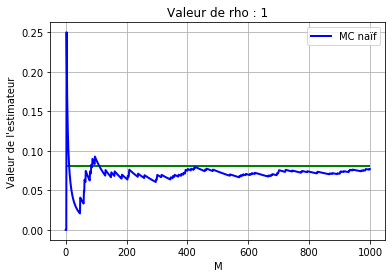

In [32]:
from numpy import sqrt, zeros, cumsum, arange, mean, std
from numpy.random import poisson
import matplotlib.pyplot as plt
import scipy.stats as sps

la = 1.0
T = 1.0
alpha = 0.5
esperance = la*T*alpha
variance = la*T*alpha**2
rho = 1 # 1, 5, 20
M=int(1e3)
x = esperance + rho*sqrt(variance)
seuil = x/alpha
valeur_theorique = sps.poisson.sf(seuil,mu=la*T)

N_mc = poisson(lam=la*T, size=M)
estim_mc = N_mc>seuil
estim_mc_cum = cumsum(estim_mc)/arange(1,M+1,dtype=float)
p_MC=mean(estim_mc)
erreur_MC = 1.96*sqrt(p_MC*(1-p_MC)/M) 
##############################
# Affichage d'une trajectoire
##############################
plt.plot(estim_mc_cum,'b', linewidth=2.)
plt.hlines(valeur_theorique, 0, M, 'g', linewidth=2.)
plt.title("Valeur de rho : " + str(rho))
plt.legend(['MC na√Øf'], loc="best")
plt.xlabel("M")
plt.ylabel("Valeur de l'estimateur")
plt.grid()
##############################
# Affichages num√©riques
##############################
print("Proba th√©orique = %1.3e \n" %valeur_theorique)
print("M = %1.3e \n" %M)
print("Estimateur MC na√Øf = %1.3e\n" %p_MC)
print("Intervalle de confiance asymptotique √† 95%% : +/- %1.3e\n" %erreur_MC)
print("Erreur relative*100 = %1.2f \n" %(100*2*erreur_MC/valeur_theorique))

D'apr√®s la question 5, l'estimateur Monte-Carlo par √©chantillonnage d'importance s'√©crit 
$$\hat I^{IS}_M  = \frac{1}{M} \sum_{k=1}^M \mathbf{1}_{\tilde N_T^{(k)} > x/\alpha}
        \exp(-\theta_x \, \alpha \tilde N_T^{(k)} + \Gamma_T(\theta_x))$$
o√π les $\tilde N_T^{(k)}$ sont cette fois des v.a. i.i.d. de Poisson de param√®tre
      $\lambda T \exp(\alpha \theta_x)$. Par le th√©or√®me central limite, on a donc
$$\sqrt{M}\left(\hat I^{IS}_M-I\right)\xrightarrow[M\to\infty]{d}\mathcal{N}(0,(\sigma^{IS})^2),$$
avec
$$(\sigma^{IS})^2=\mathbb{V}_{\theta_x}\left(\mathbf{1}_{\tilde N_T > x/\alpha}
        \exp(-\theta_x \, \alpha \tilde N_T + \Gamma_T(\theta_x))\right)=\mathbb{E}_{\theta_x}\left[\mathbf{1}_{\tilde N_T > x/\alpha}
        \exp(-2\theta_x \, \alpha \tilde N_T + 2\Gamma_T(\theta_x))\right]-I^2$$
que l'on estime par sa variance empirique
$$(\hat \sigma^{IS}_M)^2=\frac{1}{M} \sum_{k=1}^M \mathbf{1}_{\tilde N_T^{(k)} >
        x/\alpha} \exp(-2 \theta_x \, \alpha \tilde N_T^{(k)} + 2
      \Gamma_T(\theta_x)) - \left( \hat I^{IS}_M \right)^2.$$
Toujours par le lemme de Slutsky, un intervalle de confiance asymptotique √† $95 \%$ est donc  
$$\left[\hat I^{IS}_M \pm 1.96 \frac{\hat\sigma_M^{IS}}{\sqrt{M}}\right].$$
Rappelons que l'√©cart-type empirique $\hat\sigma_M^{IS}$ de l'√©chantillon des $\mathbf{1}_{\tilde N_T^{(k)} > x/\alpha}\exp(-\theta_x \, \alpha \tilde N_T^{(k)} + \Gamma_T(\theta_x))$ s'obtient simplement par la commande `std` du module `numpy`.

Proba th√©orique = 3.421e-22 

M = 1.000e+03 

Estimateur par √©chantillonnage d'importance = 2.823e-22

Intervalle de confiance asymptotique √† 95% : +/- 6.108e-23

Erreur relative*100 = 35.70 



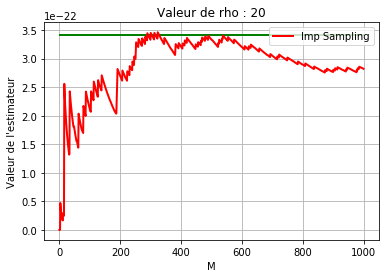

In [35]:
from numpy import sqrt, log, exp, zeros, cumsum, arange, mean, std
import matplotlib.pyplot as plt
import scipy.stats as sps
from numpy.random import poisson

la = 1.0
T = 1.0
alpha = 0.5
esperance = la*T*alpha
variance = la*T*alpha**2
rho = 20 # 1, 5, 20
M=int(1e3)

x = esperance + rho*sqrt(variance)
seuil = x/alpha
valeur_theorique = sps.poisson.sf(seuil,mu=la*T)
thetax = log(x/esperance)/alpha
GammaT = la*T*(exp(alpha*thetax) - 1)

N_is = poisson(lam=la*T*exp(alpha*thetax), size=M)
ratio_is = exp(-thetax*alpha*N_is + GammaT)
estim_is = ratio_is*(N_is>seuil)
estim_is_cum=cumsum(estim_is)/arange(1,M+1,dtype=float)
p_IS=mean(estim_is)
erreur_IS=1.96*std(estim_is)/sqrt(M)
##############################
# Affichage d'une trajectoire
##############################
plt.figure(1)
plt.plot(estim_is_cum,'r', linewidth=2.)
plt.hlines(valeur_theorique, 0, M, 'g', linewidth=2.)
plt.title("Valeur de rho : " + str(rho))
plt.legend(['Imp Sampling'], loc="best")
plt.xlabel("M")
plt.ylabel("Valeur de l'estimateur")
plt.grid()
##############################
# Affichages num√©riques
##############################
print("Proba th√©orique = %1.3e \n" %valeur_theorique)
print("M = %1.3e \n" %M)
print("Estimateur par √©chantillonnage d'importance = %1.3e\n" %p_IS)
print("Intervalle de confiance asymptotique √† 95%% : +/- %1.3e\n" %erreur_IS)
print("Erreur relative*100 = %1.2f \n" %(100*2*erreur_IS/valeur_theorique))

## 3. M√©thode de splitting et Processus de Poisson

### 3.1. Rappels de cours : m√©thode de splitting via MCMC

Soit $\mathbf{N} = (N_t)_{t \geq 0}$ un processus de Poisson homog√®ne de param√®tre $\lambda
$. Pour calculer la probabilit√© d'un √©v√©nement rare de la forme $ \{ \Phi(\mathbf{N})
\leq a \}$ o√π $\Phi(\mathbf{N})$ d√©signe une fonctionnelle de la trajectoire du
processus de Poisson $(N_t)_{t \geq 0}$, la m√©thode de splitting consiste √†
- choisir $K$ seuils : $a = a_K < \cdots < a_2 < a_1 < a_0 = +\infty$ ;
- pour tout $k =1, \cdots, K$, approcher $\mathbb{P}\left(\Phi(\mathbf{N}) \leq a_{k}
    \vert \Phi(\mathbf{N}) \leq a_{k-1} \right)$ par un estimateur $\hat{\pi}_k$. 
- estimer $\mathbb{P}(\Phi(\mathbf{N}) \leq a)$ par $\prod_{k=1}^K \hat{\pi}_k$.

Soit $k \in \{1, \cdots, K \}$ fix√©. L'algorithme *MCMC pour loi conditionnelle* ci-dessous permet de produire une suite de processus de Poisson $\{\mathbf{N}^\ell, \ell \geq 0 \}$, v√©rifiant une loi forte des grands nombres : pour tout $b \in \mathbb{R}$, on a
$$\frac{1}{M} \sum_{\ell=1}^M \mathbf{1}_{\Phi(\mathbf{N}^\ell) \leq b}
 \quad \mathop{\longrightarrow}^{\mathrm{p.s.}}_{M \rightarrow \infty} \quad  \mathbb{P}\left(\Phi(\mathbf{N}) \leq b \ \vert\ \Phi(\mathbf{N})
  \leq a_{k-1} \right).$$
Plus pr√©cis√©ment, cet algorithme construit une cha√Æne de Markov $\mathbf{N}^\ell$ √† valeurs dans un espace de processus de Poisson, pour laquelle le th√©or√®me ergodique s'applique (pour plus de d√©tails, on pourra consulter l'article [Rare event simulation using reversible shaking transformations](https://hal.archives-ouvertes.fr/hal-01058748/document)). Il peut donc √™tre utilis√© pour construire l'estimateur $\hat{\pi}_k$. 

Algorithme MCMC pour loi conditionnelle $\mathbb{P} (\cdot\ \vert\ \Phi(\mathbf{N})\leq a_{k-1})$} 
- Param√®tres d'impl√©mentation : $p \in ]0,1[$, $a_{k-1} \in \mathbb{R}$, $M \in \mathbb{N}$
- Initialisation : $\mathbf{N}^{0}$ un processus de Poisson homog√®ne de param√®tre
  $\lambda$ tel que $\Phi(\mathbf{N}^0) \leq a_{k-1}$.
- Pour $\ell = 0, \cdots, M-1$ : √©tant donn√© $\mathbf{N}^{\ell}$,

   (a) construire un candidat $\widetilde{\mathbf{N}}^{\ell+1}$ par *coloriage*, c'est-√†-dire : garder chaque saut de $\mathbf{N}^\ell$ avec probabilit√© $p$, de mani√®re ind√©pendante : on obtient $\mathbf{N}^{\ell,p}$ ; construire un processus de Poisson homog√®ne $\widetilde{\mathbf{N}}$ de param√®tre $(1-p) \lambda$, ind√©pendant de $\mathbf{N}^{\ell,p}$ ; renvoyer la somme $\widetilde{\mathbf{N}}^{\ell+1} := \mathbf{N}^{\ell,p} + \widetilde{\mathbf{N}}$.
   
   (b) si $\Phi(\widetilde{\mathbf{N}}^{\ell+1}) \leq a_{k-1}$, poser $\mathbf{N}^{\ell+1} =
    \widetilde{\mathbf{N}}^{\ell+1}$. Sinon,  poser $\mathbf{N}^{\ell+1} = \mathbf{N}^{\ell}$.
    
Remarque : L'algorithme *MCMC pour loi conditionnelle* est un algorithme de rejet : on rejette tous les candidats $\widetilde{\mathbf{N}}^{\ell+1}$ qui ne satisfont pas la condition $\Phi(\widetilde{\mathbf{N}}^{\ell+1}) \leq a_{k-1}$. Pour chacune des $K-1$ cha√Ænes simul√©es par cet algorithme, il est int√©ressant d'observer l'√©volution du taux d'acceptation le long de la trajectoire
$$M \mapsto \frac{1}{M} \sum_{\ell=1}^M \mathbf{1}_{\mathbf{N}^{\ell} = \widetilde{\mathbf{N}^{\ell}}}.$$
Comme nous allons le voir, ce taux d'acceptation d√©pend du param√®tre $p$.    

### 3.2. Application

On reprend l'application d√©crite en Section 2.3, avec $\nu=\delta_\alpha$.

#### Question 8
Montrer que p.s.
$$\min_{0 \leq t \leq T} \left\{ C + \Lambda t - \alpha N_t \right\} = \min_{n
  \geq 0 \ \text{t.q.} \ T_n \leq T} \left\{ C + \Lambda T_n - \alpha n\right\}.$$

##### _R√©ponse :_
En notant que, pour tout $t \in [ T_j, T_{j+1}[$,
$$C + \Lambda t - \alpha \, N_{t} = C + \Lambda t - \alpha \, j = \left( C + \Lambda T_j -
  \alpha \, j \right) + \Lambda (t -T_j) \geq C + \Lambda T_j - \alpha \, j,$$
on en d√©duit l'√©galit√©. Par cons√©quent, pour calculer le minimum des liquidit√©s
le long d'une trajectoire sur $[0,T]$, il suffit de regarder les valeurs prises
par le processus des liquidit√©s en les instants de sauts sur $[0,T]$.

#### Question 9 
On veut estimer la probabilit√© de ruine de l'assurance avant l'instant $T$, c'est-√†-dire :
$$\mathbb{P}\left( \min_{0 \leq t \leq T} \left\{ C + \Lambda t - \alpha N_t \right\}
    \leq 0 \right).$$
On prendra $T=1$, $C= 100$, $\Lambda = 30$, $\alpha=30$, $a_k = C (1-(k/K)^2)$ et
   $(\lambda,K) =(1,3)$ ou $(\lambda, K) = (0.05,8)$. On envisagera diff√©rentes valeurs de $p\in\{0.1,0.2,\dots,0.9\}$.

(a) Impl√©menter l'algorithme de splitting combin√© √† l'algorithme *MCMC pour loi conditionnelle* pour estimer cette probabilit√© de ruine. Observer la consistance des estimateurs $\hat \pi_k$, $k=1, \cdots, K$, c'est-√†-dire que ces sont des estimateurs convergents lorsque $M$ devient grand. Afficher l'√©volution du taux d'acceptation. Dans le cas $(\lambda,K) =(1,3)$, on pourra prendre $M=1e4$ ; dans le cas $(\lambda, K) = (0.05,8)$, on pourra prendre $M=1e5$. On observera par exemple les diff√©rences entre $p=0.1$,  $p=0.5$  et $p=0.9$.

##### _R√©ponse :_

Sur les figures fournies par le programme suivant, on analyse une trajectoire de l'algorithme de splitting. Sur la premi√®re, on trace les estimateurs $\hat \pi_k$ en fonction du nombre de points $M$ de la cha√Æne. Sur la seconde, on trace l'√©volution du taux d'acceptation le long de chaque cha√Æne.  
    
Lorsque $p=0.9$, les taux d'acceptation sont tr√®s √©lev√©s, mais le point propos√© $\widetilde{\mathbf{N}}^{\ell+1}$ diff√®re peu du point courant $\mathbf{N}^{\ell}$. Par suite, pour chacune des $K-1$ cha√Ænes, les valeurs successives d'une cha√Æne sont tr√®s corr√©l√©es. Dans le cas $\lambda=0.05$, il est flagrant que cette forte corr√©lation ralentit la convergence de la moyenne empirique $\hat\pi_k$. 

Lorsque $p=0.1$, le taux d'acceptation est assez faible, puisque le candidat $\widetilde{\mathbf{N}}^{\ell+1}$ diff√®re beaucoup du point courant $\mathbf{N}^{\ell}$ : la cha√Æne reste au m√™me point pendant plusieurs it√©rations. La corr√©lation entre valeurs successives est donc l√† aussi √©lev√©e.

Les seuils successifs pour le splitting sont 	
[88.88888889 55.55555556  0.        ]


Lorsque p = 0.5 et lambda = 1
	 Cha√Æne 1 sur 3
	 Pour le niveau 1, la proba estim√©e est 4.94e-01
	 Cha√Æne 2 sur 3
	 Pour le niveau 2, la proba estim√©e est 2.59e-01
	 Cha√Æne 3 sur 3
	 Pour le niveau 3, la proba estim√©e est 4.82e-02


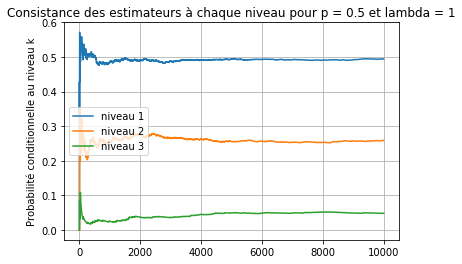

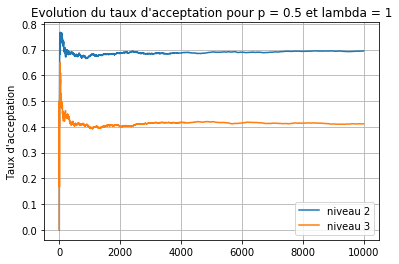


 La probabilit√© de ruine estim√©e est 6.16e-03

 Dur√©e d'ex√©cution 1.2992069721221924


In [47]:
from numpy import zeros, cumsum, arange, append, sort, concatenate
from numpy.random import poisson, rand
import matplotlib.pyplot as plt
import time

C = 100.0
Lambda  = 30.0
T = 1.0
alpha = 30.0

# Premier cas (lambda,K)=(1,3)
la,K,M = 1,3,int(1e4)
p=0.5

# Deuxi√®me cas (lambda,K)=(0.05,8)
#la,K,M = 0.05,8,int(1e5)
#p=0.5

# Calcul des seuils successifs
ak = C*(1-((arange(K,dtype=float)+1)**2/K**2))
print("Les seuils successifs pour le splitting sont \t")
print(ak); print("\n")

TempsDepart = time.time()

print("Lorsque p = "+ str(p) +" et lambda = " + str(la))   
plt.clf()
        
##----------
# NIVEAU 1
##----------

NbRuine = zeros(M+1,dtype=float)
print("\t Cha√Æne 1 sur "+ str(K))
# Boucle pour simuler chaque processus
for n_chain in arange(M): 
    NumberJump = poisson(lam=la*T) # Nombre de sauts du processus de Poisson courant
    TimeJump = sort(T*rand(NumberJump))
    Reserve = C+Lambda*append(0,TimeJump)-alpha*arange(NumberJump+1)
    # on met √† jour l'estimateur
    if min(Reserve)<=ak[0]:
        # on augmente le compteur
        NbRuine[n_chain+1] = NbRuine[n_chain]+1
        # on stocke ce processus comme possible point de d√©part pour la cha√Æne suivante
        PathPoissonInit = TimeJump
    else: 
        # on ne change pas le compteur
        NbRuine[n_chain+1] = NbRuine[n_chain]
# Affichage de l'estimateur de la proba pour ce niveau
ProbaEnd = NbRuine[-1]/M
print ("\t Pour le niveau 1, la proba estim√©e est %1.2e" %ProbaEnd)
# Visualisation de la consistance de l'estimateur
plt.figure(1)
plt.plot(NbRuine/(arange(M+1)+1), label="niveau 1") 

##----------
## BOUCLE POUR LES AUTRES NIVEAUX
##----------

for n_level in (1+arange(K-1)):
    print("\t Cha√Æne "+ str(n_level+1) + " sur " +str(K))
    NbRuine = zeros(M+1,dtype=float)
    RateAccept = zeros(M+1,dtype=float)
    PathPoisson = PathPoissonInit
    MinPath = zeros(M+1,dtype=float)
    MinPath[0] = min(C+Lambda*append(0,PathPoisson)-alpha*arange(len(PathPoisson)+1))
    for n_chain in arange(M):
        # Nombre de sauts dans le processus courant
        J = len(PathPoisson)
        # Sauts conserv√©s
        JumpConserve = PathPoisson[rand(J)<=p]
        # Nombre de sauts ajout√©s
        NbAjoute = poisson((1-p)*la*T)
        # Instants des sauts ajout√©s
        NewJump = T*rand(NbAjoute)
        # Processus candidat √† √™tre la nouvelle valeur de la cha√Æne
        NewPathPoisson = sort(concatenate([NewJump,JumpConserve]))
        # Acceptation-rejet de ce candidat
        NewReserve = C+Lambda*append(0,NewPathPoisson)-alpha*arange(len(NewPathPoisson)+1,dtype=float)
        if min(NewReserve)<=ak[n_level-1]:    # on accepte
            PathPoisson = NewPathPoisson    # mise √† jour de la cha√Æne
            MinPath[n_chain+1] = min(NewReserve)    # stockage valeur minimale
            RateAccept[n_chain+1] = RateAccept[n_chain]+1   # update du taux d'acceptation-rejet
        else:       # on refuse
            MinPath[n_chain+1] = MinPath[n_chain]   #   stockage valeur minimale
            RateAccept[n_chain+1] = RateAccept[n_chain] # update du taux d'acceptation-rejet
        # Calcul de l'estimateur de la probabilit√©
        if MinPath[n_chain+1]<=ak[n_level]:
            NbRuine[n_chain+1] = NbRuine[n_chain]+1
            PathPoissonInit = PathPoisson
        else:
            NbRuine[n_chain+1] = NbRuine[n_chain]
    ############
    # Affichage
    ############
    NewProbaEnd = NbRuine[-1]/M
    ProbaEnd = ProbaEnd*NewProbaEnd
    print ("\t Pour le niveau " + str(n_level+1) +", la proba estim√©e est %1.2e" %NewProbaEnd)    
    # Visualisation de la consistance de l'estimateur
    plt.figure(1)
    plt.plot(NbRuine/(arange(M+1,dtype=float)+1), label="niveau %1.0f" %(n_level+1))  
               
    # Visualisation de l'√©volution du taux d'acceptation-rejet
    plt.figure(2)
    plt.plot(RateAccept/(arange(M+1,dtype=float)+1), label="niveau %1.0f" %(n_level+1)) 
    

plt.figure(1)
plt.title("Consistance des estimateurs √† chaque niveau pour p = "+ str(p) +" et lambda = " + str(la))
plt.legend(loc="best")
plt.ylabel("Probabilit√© conditionnelle au niveau k")
plt.grid()

plt.figure(2)
plt.title("Evolution du taux d'acceptation pour p = "+ str(p) +" et lambda = " + str(la))
plt.ylabel("Taux d'acceptation")
plt.legend(loc="best")
plt.grid()

plt.show()
   
# Calcul de l'estimateur 
print("\n La probabilit√© de ruine estim√©e est %1.2e" %ProbaEnd)

TempsFin = time.time()
print("\n Dur√©e d'ex√©cution "+str(TempsFin-TempsDepart))

(b) Consid√©rons (ùúÜ,ùêæ)=(1,3), ùëÄ=1ùëí3 et ùëù‚àà{0.1,0.2,‚Ä¶,0.9}. Pour ces valeurs de ùëù, illustrer par des boxplots la variabilit√© de l'estimateur de la probabilit√© de ruine √† l'aide de plusieurs r√©alisations ind√©pendantes de cet estimateur (par exemple 100). Calculer aussi pour chaque valeur de ùëù l'erreur relative, i.e. le ratio de l'√©cart-type et de la valeur moyenne de ces r√©alisations ind√©pendantes. Quelles valeurs de ùëù pr√©coniseriez-vous ? 

##### _R√©ponse :_
Pour le programme suivant, sur la premi√®re figure, on reporte les boxplots de $100$ r√©alisations ind√©pendantes de l'estimateur de splitting en fonction de $p$. Sur la seconde figure, on trace l'√©volution en fonction de $p$ de l'erreur relative (ratio de l'√©cart-type sur la moyenne) calcul√©e √† partir de $100$ r√©alisations ind√©pendantes de l'estimateur $\prod_{k=1}^K \hat \pi_k$ de la probabilit√© de ruine. Il n'existe pas de r√©sultats th√©oriques indiquant quel est le bon choix de $p$. Cependant, on peut ainsi v√©rifier que, sur cet exemple, des valeurs trop faibles ou trop √©lev√©es de $p$ ne sont pas optimales. 

les seuils successifs pour le splitting sont 	
[88.88888889 55.55555556  0.        ]
Lorsque p = 0.1 et lambda = 1
Lorsque p = 0.2 et lambda = 1
Lorsque p = 0.3 et lambda = 1
Lorsque p = 0.4 et lambda = 1
Lorsque p = 0.5 et lambda = 1
Lorsque p = 0.6 et lambda = 1
Lorsque p = 0.7 et lambda = 1
Lorsque p = 0.8 et lambda = 1
Lorsque p = 0.9 et lambda = 1


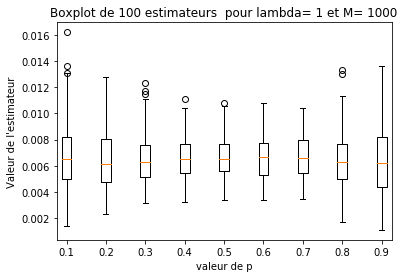

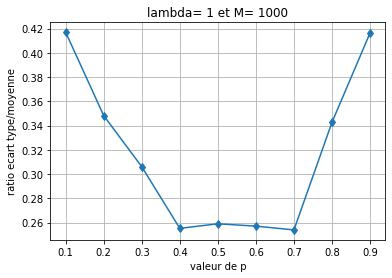

Dur√©e d'ex√©cution 58.837507247924805


In [48]:
from numpy import zeros, cumsum, arange, append, sort, concatenate, transpose, mean, std
from numpy.random import poisson, rand
import matplotlib.pyplot as plt
import time

plt.close()

C = 100.0
Lambda  = 30.0
T = 1.0
alpha = 30.0


la,K=1,3
pVecteur = [0.1,0.2,0.3,0.4, 0.5, 0.6,0.7,0.8, 0.9]
length_p = len(pVecteur)
LengthTrajVecteur=[int(1e3) for i in range(length_p)]

# Nombre de r√©alisations ind√©pendantes de l'estimateur
NbAlgo = 100


# calcul des seuils successifs
ak = C*(1-((arange(K,dtype=float)+1)**2/K**2))
print("les seuils successifs pour le splitting sont \t")
print(ak)


TempsDepart = time.time()

StockProbaEnd = zeros((length_p,NbAlgo))
# Boucle sur les valeurs de p
for n_p in arange(length_p):
     p = pVecteur[n_p]
     LengthTraj = LengthTrajVecteur[n_p]
     print("Lorsque p = "+ str(p) +" et lambda = " + str(la))   
     plt.clf()
     
     # Boucle sur les differents runs independants
     for n_algo in arange(NbAlgo):
        #print("Run "+ str(n_algo+1)+ " sur " + str(NbAlgo))
        
        ##----------
        # NIVEAU 1
        ##----------
        NbRuine = zeros(LengthTraj+1)
        #Boucle pour simuler chaque processus
        #print("\t Cha√Æne 1 sur " + str(K))
        for n_chain in arange(LengthTraj):
            # nombre de sauts du processus de Poisson courant
            NumberJump = poisson(lam=la*T)
            TimeJump = sort(T*rand(NumberJump))
            Reserve = C+Lambda*append(0,TimeJump)-alpha*arange(NumberJump+1)
            # on met a jour l'estimateur
            if min(Reserve)<=ak[0]:
               # on augmente le compteur
                NbRuine[n_chain+1] = NbRuine[n_chain]+1
                # on stocke ce point de la cha√Æne comme possible point de d√©part pour la cha√Æne suivante
                PathPoissonInit = TimeJump
            else:
                # on ne change pas le compteur
                NbRuine[n_chain+1] = NbRuine[n_chain]
        #Estimateur de la proba pour ce niveau
        ProbaEnd = NbRuine[-1]/LengthTraj
        
            
        ## BOUCLE POUR LES AUTRES NIVEAUX
        for n_level in (1+arange(K-1)):
            #print("\t Cha√Æne "+ str(n_level+1)+ " sur " + str(K))
            NbRuine = zeros(LengthTraj+1)
            RateAccept = zeros(LengthTraj+1)
            PathPoisson = PathPoissonInit
            MinPath = zeros(LengthTraj+1)
            MinPath[0] = min(C+Lambda*append(0,PathPoisson)-alpha*arange(len(PathPoisson)+1))
            for n_chain in arange(LengthTraj):
                # Nombre de sauts dans le processus courant
                J = len(PathPoisson)
                # Quels sauts sont conserv√©s
                JumpConserve = PathPoisson[rand(J)<=p]
                # Nombre de sauts ajout√©s
                NbAjoute = poisson((1-p)*la*T)
                # Instants de sauts ajout√©s
                NewJump = T*rand(NbAjoute)
                # Processus candidat √† √™tre la nouvelle valeur de la cha√Æne
                NewPathPoisson = sort(concatenate([NewJump,JumpConserve]))
                # Acceptation-rejet de ce candidat
                NewReserve = C+Lambda*append(0,NewPathPoisson)-alpha*arange(len(NewPathPoisson)+1)
                if min(NewReserve)<=ak[n_level-1]:    # on accepte
                    PathPoisson = NewPathPoisson    # mise √† jour de la cha√Æne
                    MinPath[n_chain+1] = min(NewReserve)    # stockage valeur minimale
                    RateAccept[n_chain+1] = RateAccept[n_chain]+1   # mise √† jour du taux d'acceptation-rejet
                else:       # on refuse
                    MinPath[n_chain+1] = MinPath[n_chain]   #   stockage valeur minimale
                    RateAccept[n_chain+1] = RateAccept[n_chain] # mise √† jour du taux d'acceptation-rejet
                # Calcul de l'estimateur de la probabilit√©
                if MinPath[n_chain+1]<=ak[n_level]:
                    NbRuine[n_chain+1] = NbRuine[n_chain]+1
                    PathPoissonInit = PathPoisson
                else:
                    NbRuine[n_chain+1] = NbRuine[n_chain]
            
            NewProbaEnd = NbRuine[-1]/LengthTraj
            ProbaEnd = ProbaEnd*NewProbaEnd
               
            
 
        StockProbaEnd[n_p,n_algo] = ProbaEnd

plt.clf()
   
plt.figure(1)
plt.title("Boxplot de " + str(NbAlgo) +" estimateurs  pour lambda= " +str(la) + " et M= "+str(LengthTrajVecteur[0]))
plt.boxplot( transpose(StockProbaEnd), positions= [2*i+1 for i in range(length_p)], labels = [str(x) for x in pVecteur])
plt.xlabel("valeur de p")
plt.ylabel("Valeur de l'estimateur")


plt.figure(2)
M =  mean(StockProbaEnd, axis=1)
S =  std(StockProbaEnd, axis=1)
plt.plot(pVecteur, S/M, 'd-')
plt.xlabel("valeur de p")
plt.ylabel("ratio ecart type/moyenne")
plt.title("lambda= " +str(la)+ " et M= "+str(LengthTrajVecteur[0]))
plt.grid()

plt.show()

TempsFin = time.time()
print("Dur√©e d'ex√©cution "+str(TempsFin-TempsDepart))